# STEP 1 - IMPORTING THE DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import os
os.chdir('D:\\Machine Learning Practical 6 Real-World Applications')

In [2]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv')

In [3]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')

# STEP 2 - VISUALISING THE DATASET

In [4]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [8]:
fashion_train_df.shape

(60000, 785)

In [9]:
fashion_test_df.shape

(10000, 785)

In [10]:
training = np.array(fashion_train_df, dtype = 'float32')

In [11]:
testing = np.array(fashion_test_df, dtype = 'float32')

8.0

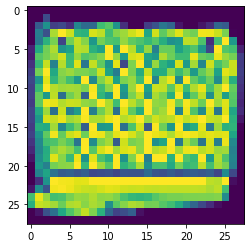

In [12]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i, 0]
label

In [ ]:
# Remember the 10 classes decoding is as follow:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle Boot


In [ ]:
# let's view images in a grid format
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flattening

n_training = len(training) 

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

# STEP 3 - TRAINING THE MODEL

In [ ]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

In [ ]:
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],*(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0],*(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28, 28, 1))

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
X_validate.shape

In [ ]:
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential()

In [ ]:
cnn_model.add(Conv2D(64, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

In [ ]:
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
cnn_model.add(Flatten())

In [ ]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

In [ ]:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

In [ ]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [ ]:
epochs = 50

In [ ]:
cnn_model.fit(x=X_train,
              y=y_train,
              batch_size=512,
              nb_epoch=epochs,
              verbose=1,
              validation_data=(X_validate, y_validate))

# STEP 4 - EVALUATING THE MODEL

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

In [ ]:
predicted_classes = cnn_model.predict_classes(X_test)

In [ ]:
predicted_classes

In [ ]:
L = 5
W = 5
fig, axes  = plt.subplots(L,W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class = {:0.1f}\n True Class = {:0.1f}'.format(predicted_classes[i], y_test[i]))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

In [ ]:
cnn_model.save('model.h4')

In [ ]:
from keras.models import load_model
cnn_model = load_model('model.h4')